# Uzdevums 1

**6 kauliņi**

 Uztaisiet 100 000 garu sarakstu ar 6 metam kauliņu summu. (6 metienu summa vienā mērijumā) 

Saskaitiet šo summu biežumu (izmantojam Counter)

Attēlojam stabiņu( vai kādā citā) diagrammā.

In [29]:
# first what python version
import sys
print(f"Python version: {sys.version}")
print(f"Python executable: {sys.executable}")
# datetime
from datetime import datetime
print(f"Current date and time: {datetime.now()}")

import random # again standard library
from collections import Counter # standard library

# now external libraries
#izmantojam matplotlib lai attēlotu datus
import matplotlib.pyplot as plt

Python version: 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]
Python executable: d:\Github\Python_RTU_2024_25\myvenv\Scripts\python.exe
Current date and time: 2025-04-30 21:33:07.386060


In [20]:
def roll_dice(sides=6, rolls=1):
    total = 0
    for _ in range(rolls):
        total += random.randint(1, sides) # randint is rare that it includes both ends
    return total
# show a simple example of rolling a die
print("Rolling a die:")
for rolls in range(1,5):
    print(f"Rolling {rolls} dice", roll_dice(rolls=rolls))

Rolling a die:
Rolling 1 dice 1
Rolling 2 dice 8
Rolling 3 dice 11
Rolling 4 dice 13


In [28]:
# now let's create a function that takes in number or throws and number of dice and number of sides
# returns a list of the results
def get_dice_throws(rolls=100_000, num_dice=1, sides=6):
    results = []
    for _ in range(rolls):
        result = roll_dice(sides, num_dice)
        results.append(result)
    # we could have done this with list comprehension, but this is easier to read
    return results

# let's roll 2 dice 10 times
results = get_dice_throws(rolls=10, num_dice=2)
print("Rolling 2 dice 10 times:")
for i, result in enumerate(results):
    print(f"Roll {i+1}: {result}")


Rolling 2 dice 10 times:
Roll 1: 7
Roll 2: 7
Roll 3: 11
Roll 4: 6
Roll 5: 3
Roll 6: 10
Roll 7: 11
Roll 8: 6
Roll 9: 6
Roll 10: 3


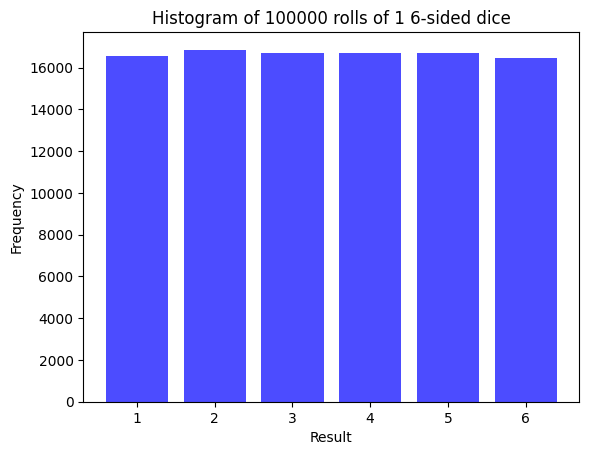

In [33]:
# now finally let's make a plotting function
def plot_dice_throws(rolls=100_000, num_dice=1, sides=6, color='blue', save_path=None):	
    results = get_dice_throws(rolls, num_dice, sides)
    # count the frequency of each result
    counts = Counter(results)
    x = list(counts.keys())
    y = list(counts.values())
    plt.bar(x, y, color=color, alpha=0.7)
    plt.xlabel('Result')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {rolls} rolls of {num_dice} {sides}-sided dice')
    plt.xticks(range(num_dice, num_dice * sides + 1))
    if save_path:
        plt.savefig(save_path)
    plt.show()

# let's plot the results of rolling 1 dice 1000 times
plot_dice_throws(rolls=100_000, num_dice=1, sides=6, color='blue', save_path='dice_1.png')

Rolling 1 dice 100_000 times


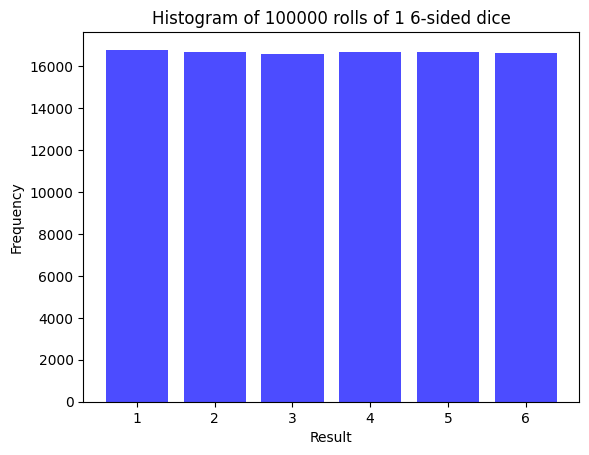

****************************************
Rolling 2 dice 100_000 times


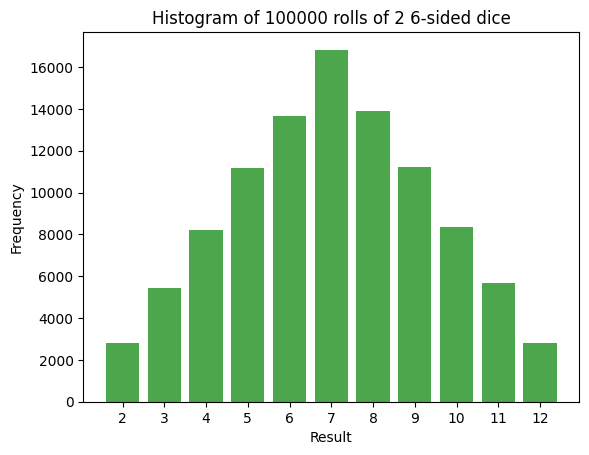

****************************************
Rolling 3 dice 100_000 times


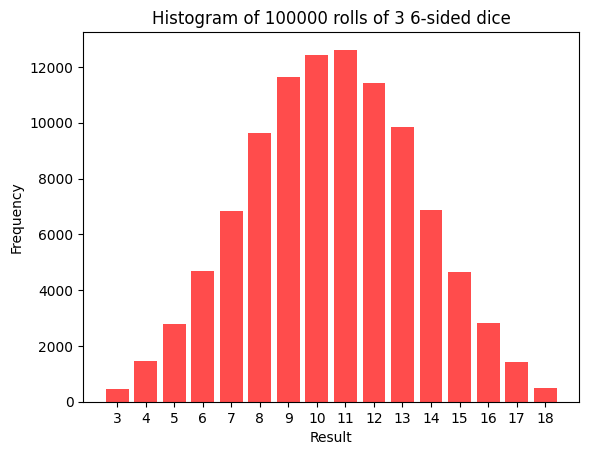

****************************************
Rolling 4 dice 100_000 times


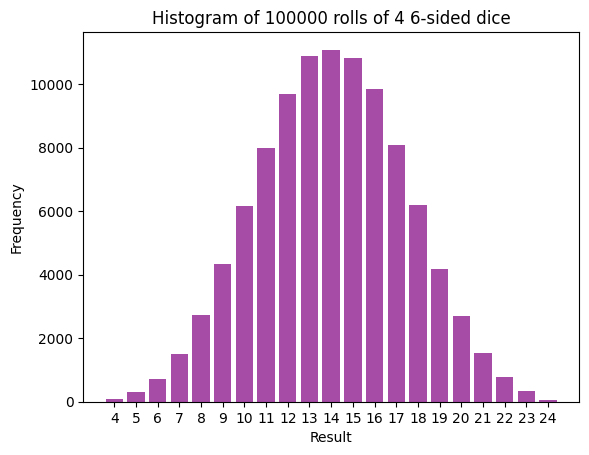

****************************************
Rolling 5 dice 100_000 times


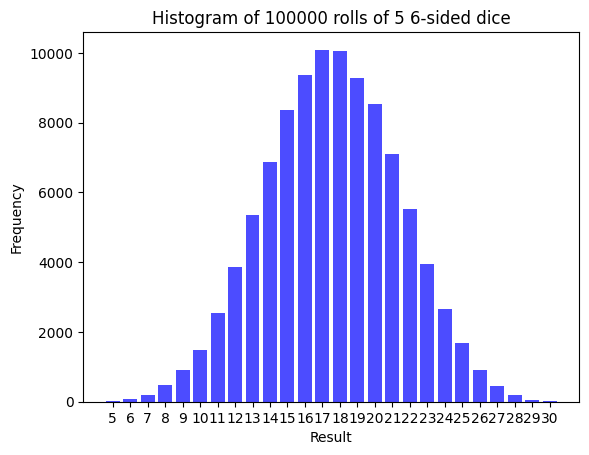

****************************************
Rolling 6 dice 100_000 times


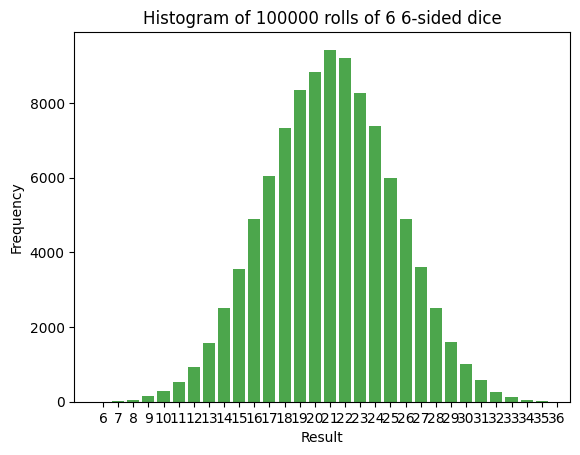

****************************************
Rolling 7 dice 100_000 times


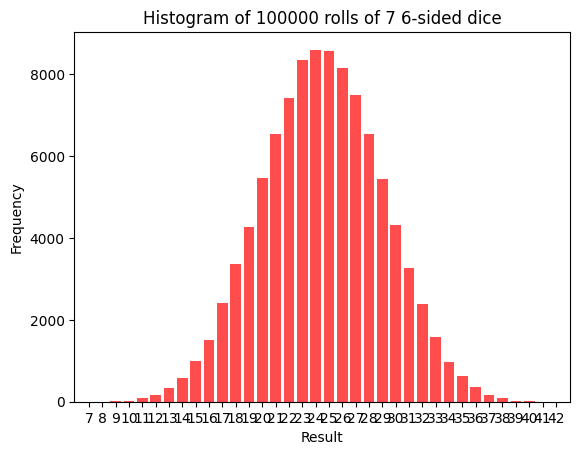

****************************************
Rolling 8 dice 100_000 times


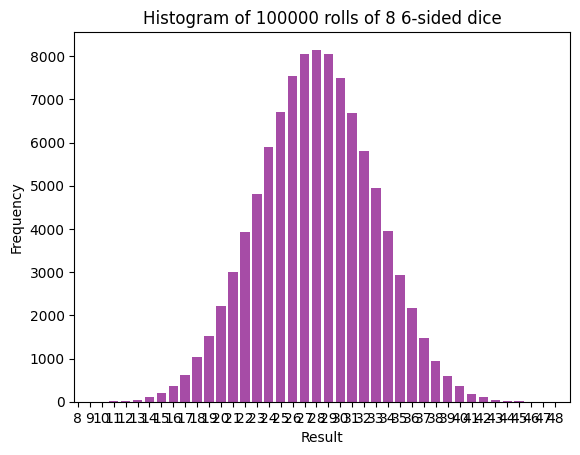

****************************************


In [34]:
# so let's plot the results of rolling 1 to 8 dice 100_000 times
# also we will use cycle to create a list of colors
from itertools import cycle
colors = ['blue', 'green', 'red', 'purple']
color_cycle = cycle(colors) # this way we never run out of colors
for num_dice in range(1, 9):
    color = next(color_cycle)
    print(f"Rolling {num_dice} dice 100_000 times")
    plot_dice_throws(num_dice=num_dice, 
                     color=color, 
                     save_path=f'dice_{num_dice}.png')
    print("*"*40)

## Standard Distribution

Compare our results with the standard distribution of 6 dice.

![Bell curve](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/700px-Standard_deviation_diagram.svg.png)

[Wiki on Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)